## Feature Engieering

In this lab, you will work on a new dataset, carseat dataset, to practice data preprocessing implementation. 



It is a dataset that can shows carseat sales information (https://rdrr.io/cran/ISLR/man/Carseats.html). It has 400 records on the following 11 variables.

    Sales
    Unit sales (in thousands) at each location

    CompPrice
    Price charged by competitor at each location

    Income
    Community income level (in thousands of dollars)

    Advertising
    Local advertising budget for company at each location (in thousands of dollars)

    Population
    Population size in region (in thousands)

    Price
    Price company charges for car seats at each site

    ShelveLoc
    A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

    Age
    Average age of the local population

    Education
    Education level at each location

    Urban
    A factor with levels No and Yes to indicate whether the store is in an urban or rural location

    US
    A factor with levels No and Yes to indicate whether the store is in the US or not




1. First load the data and read it to a csv file

1.1 Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.2 Load the data (Carseat.csv)

In [2]:
import pandas as pd
carseat_data=pd.read_csv('/content/drive/My Drive/data_sets/Carseat.csv')
df=carseat_data.copy()

## 2. Convert categorical values to numerical values 

2.1 List all the non-numeric attributes, using df.select_dtypes(include=['object','string'])

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html


In [3]:
df.select_dtypes(include=['object', 'string'])

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


2.2 It seems tthat there are three attributes are non-numeric, including ShelveLoc, Urban, and US. We will convert the categorical values to numrical

2.2.1 List the unique values of ShelveLoc (hint: use `df[col].unique())` and the counts for each value (hint: `use df[col].value_counts()`)

In [4]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [5]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

2.2.2 We know now that ShelveLoc has three unique values and they are ordinal: Bad, Medium, and Good. So the encoding should follow this order as well. Here we define a dictionary, i.e., 'Bad': -1, 'Medium': 0, 'Good': 1. Then we apply this to the column. Another reasonable mapping is 'Bad': 1, 'Medium': 2, 'Good': 3. 

In [6]:
map_ShelveLoc={'Bad': -1, 'Medium': 0, 'Good': 1}
df['ShelveLoc']=df['ShelveLoc'].map(map_ShelveLoc)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,-1,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,0,59,12,Yes,Yes
3,7.40,117,100,4,466,97,0,55,14,Yes,Yes
4,4.15,141,64,3,340,128,-1,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,0,55,11,No,Yes
397,7.41,162,26,12,368,159,0,40,18,Yes,Yes
398,5.94,100,79,7,284,95,-1,50,12,Yes,Yes


2.2.3 For Urban, check the unique values and map Yes to 1 and No to 0. 

In [7]:
df['Urban'].value_counts()
df['Urban']=df['Urban'].apply(lambda x: 1 if x=='Yes' else 0)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,-1,42,17,1,Yes
1,11.22,111,48,16,260,83,1,65,10,1,Yes
2,10.06,113,35,10,269,80,0,59,12,1,Yes
3,7.40,117,100,4,466,97,0,55,14,1,Yes
4,4.15,141,64,3,340,128,-1,38,13,1,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,Yes
396,6.14,139,23,3,37,120,0,55,11,0,Yes
397,7.41,162,26,12,368,159,0,40,18,1,Yes
398,5.94,100,79,7,284,95,-1,50,12,1,Yes


2.2.4 Check the unique values for US, map Yes to 1 and No to 0

In [8]:
df['US'].value_counts()
df['US']=df['US'].apply(lambda x: 1 if x=='Yes' else 0)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,-1,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,0,59,12,1,1
3,7.40,117,100,4,466,97,0,55,14,1,1
4,4.15,141,64,3,340,128,-1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,0,55,11,0,1
397,7.41,162,26,12,368,159,0,40,18,1,1
398,5.94,100,79,7,284,95,-1,50,12,1,1


2.2.5 Check the sknewness of each column and identify those larger than 1. 

In [9]:
df.skew()

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
ShelveLoc      0.032364
Age           -0.077182
Education      0.044007
Urban         -0.902426
US            -0.608327
dtype: float64

## 3. Scaling the data

3.1 Display the value distribution of the original data using histogram (hint: using ```df.hist(figsize=(10,0)```)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f040bebb890>,
      dtype=object)

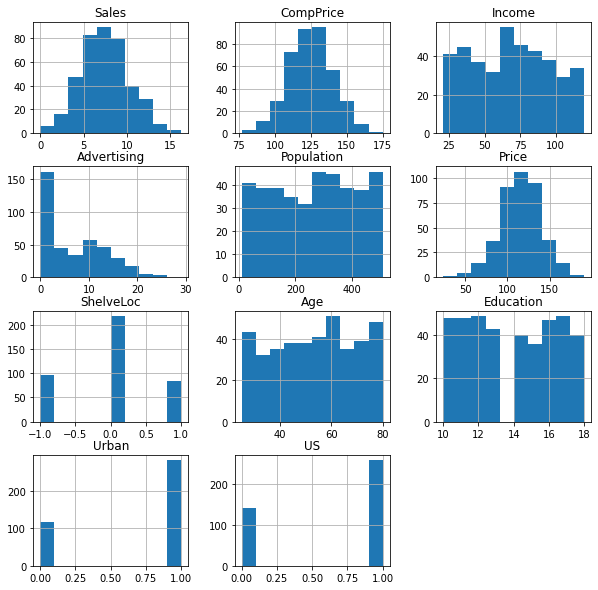

In [10]:
df.hist(figsize=(10,10))

3.2 Use either standard scaler of min-max scaler to scale all the columns except for Sales (this is the targeted variable for machine learning models we will cover later in the semester. Use the code in 3.1 to visualize the value distributions of the new data frame. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03fdf46950>,
      dtype=object)

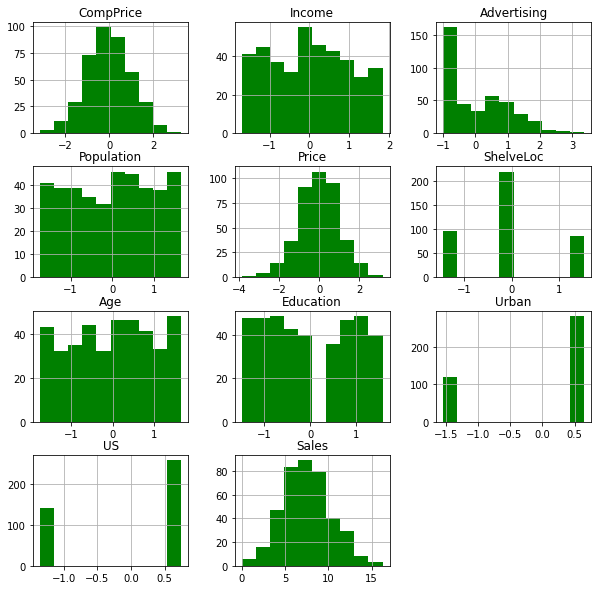

In [11]:
from sklearn.preprocessing import StandardScaler
sscaler=StandardScaler()# define a standard scaler
new_df=df.drop('Sales', axis=1)
ss_carseat=sscaler.fit_transform(new_df) #apply the scaler
new_df=pd.DataFrame(ss_carseat, columns=new_df.columns)
new_df['Sales']=df['Sales']
new_df.hist(figsize=(10,10), color='green')

## 4. Discrete numerical values

4.1 Discretizing the Price values to 5 bins using quantile binining. You can either you pd.qcut, or sklearn.

In [12]:
new_df=df.copy()
new_df
Price_label=[0,1,2,3,4]
new_df['Price'] = pd.qcut(new_df['Price'], q=5, labels=Price_label)
new_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,2,-1,42,17,1,1
1,11.22,111,48,16,260,0,1,65,10,1,1
2,10.06,113,35,10,269,0,0,59,12,1,1
3,7.40,117,100,4,466,1,0,55,14,1,1
4,4.15,141,64,3,340,3,-1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,3,1,33,14,1,1
396,6.14,139,23,3,37,2,0,55,11,0,1
397,7.41,162,26,12,368,4,0,40,18,1,1
398,5.94,100,79,7,284,0,-1,50,12,1,1


4.2 Visualize the counts of each bin using bar chart

Text(0, 0.5, 'Count')

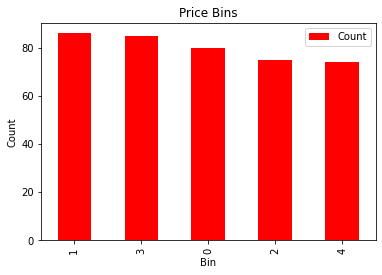

In [13]:
s=new_df['Price'].value_counts().to_frame()
s.columns=['Count']
ax=s.plot.bar(color='red',title='Price Bins')
ax.set_xlabel('Bin')
ax.set_ylabel('Count')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf886d58-b5c5-494f-83a3-52efa87a4945' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>